In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer 
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
dt=pd.read_excel("Data_train.xlsx")
dt.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [3]:
temp = dt["Name"].str.split(" ", n = 1, expand = True)
dt['Brand']=temp[0]
dt['Model']=temp[1]
dt['Engine']=dt.Engine.str.split(" ").str[0]
dt['Power']=dt.Power.str.split(" ").str[0]
dt['Mileage']=dt.Mileage.str.split(" ").str[0]
dt['Year']=np.subtract(2020,dt['Year'])

dt.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,10,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,5,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,9,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,8,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,7,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [4]:
dt.Year.isnull().sum()

0

In [5]:
dt.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Brand                 object
Model                 object
dtype: object

In [6]:
dt['Power'].replace('null ',float('NaN'),inplace=True)
dt['Power'].replace('null',float('NaN'),inplace=True)


In [7]:
dt.dropna(subset=['Mileage','Power','Engine','Seats'],inplace=True)
print(dt.isnull().sum())
print(dt.describe())
print(dt.head())


Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
dtype: int64
              Year  Kilometers_Driven        Seats        Price
count  5872.000000       5.872000e+03  5872.000000  5872.000000
mean      6.522309       5.831700e+04     5.283719     9.603919
std       3.164568       9.216941e+04     0.805081    11.249453
min       1.000000       1.710000e+02     2.000000     0.440000
25%       4.000000       3.342250e+04     5.000000     3.517500
50%       6.000000       5.260900e+04     5.000000     5.750000
75%       8.000000       7.240275e+04     5.000000    10.000000
max      22.000000       6.500000e+06    10.000000   160.000000
                               Name    Location  Year  Kilometers_Driven  \
0            

In [8]:
dt.shape

(5872, 14)

In [9]:
dt.drop(columns=['Name'],inplace=True)
dt.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,10,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Pune,5,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,9,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,Honda,Jazz V
3,Chennai,8,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Coimbatore,7,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [10]:
dt.dropna(how="all",inplace=True)
dt['Power']=dt['Power'].astype(float)
dt['Mileage']=dt['Mileage'].astype(float)
dt['Engine']=dt['Engine'].astype(float)
dt['Year']=dt['Year'].astype(float)
dt['Kilometers_Driven']=dt['Kilometers_Driven'].astype(float)


dt.dtypes

Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Brand                 object
Model                 object
dtype: object

In [11]:
col=['Year','Mileage','Engine','Power','Kilometers_Driven','Price']
for i in col:
    Q1 = dt['{}'.format(i)].quantile(0.25)
    Q3 = dt['{}'.format(i)].quantile(0.75)
    IQR = Q3 - Q1
    m1=Q1 - (1.5 * IQR)
    m2=Q3 + (1.5 * IQR)
    k2=dt.loc[dt['{}'.format(i)]>=m2, '{}'.format(i)].median()
    k1=dt.loc[dt['{}'.format(i)]<=m1, '{}'.format(i)].median()
    dt.loc[dt['{}'.format(i)]>=m2, '{}'.format(i)]=k2
    dt.loc[dt['{}'.format(i)]<=m1, '{}'.format(i)]=k1

In [12]:

le=LabelEncoder()

dt['Brand']=le.fit_transform(dt['Brand']).astype(float)
dt['Location']=le.fit_transform(dt['Location']).astype(float)
dt['Fuel_Type']=le.fit_transform(dt['Fuel_Type']).astype(float)
dt['Transmission']=le.fit_transform(dt['Transmission']).astype(float)
dt['Owner_Type']=le.fit_transform(dt['Owner_Type']).astype(float)
dt['Model']=le.fit_transform(dt['Model']).astype(float)
dt['Engine']=dt['Engine'].astype(float)
dt['Power']=dt['Power'].astype(float)
#dt.drop('Mileage',axis=1,inplace=True)
#dt.drop('Name',axis=1,inplace=True)
dt.head()



,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,9.0,10.0,72000.0,0.0,1.0,0.0,26.60,998.0,58.16,5.0,1.75,18.0,1579.0
1,10.0,5.0,41000.0,1.0,1.0,0.0,19.67,1582.0,126.20,5.0,12.50,10.0,450.0
2,2.0,9.0,46000.0,3.0,1.0,0.0,18.20,1199.0,88.70,5.0,4.50,9.0,889.0
3,2.0,8.0,87000.0,1.0,1.0,0.0,20.77,1248.0,88.76,7.0,6.00,18.0,606.0
4,3.0,7.0,40670.0,1.0,0.0,2.0,15.20,1968.0,140.80,5.0,17.74,1.0,93.0


In [13]:

#ohe=OneHotEncoder(sparse=False)
#y=dt["Price"]
#dt.drop(columns=["Price"],inplace=True)
#column_trans=make_column_transformer((OneHotEncoder(),['Location','Fuel_Type','Transmission','Owner_Type','Model','Brand']),remainder='passthrough')
#data=column_trans.fit_transform(dt)

In [14]:

y=dt["Price"]
dt.drop(columns=["Price"],inplace=True)
col=dt.columns
rbst=RobustScaler()
data=pd.DataFrame(rbst.fit_transform(dt),columns=col)

In [15]:
#dt[['Kilometers_Driven']]=rbst.fit_transform(dt[['Kilometers_Driven']])

In [16]:

xtrain,xtest,ytrain,ytest=train_test_split(data,y,test_size=0.3)
xtrain=xtrain.astype(np.float64)
ytrain=ytrain.astype(np.float64)
xtest=xtest.astype(np.float64)
ytest=ytest.astype(np.float64)


0.7717174270990463
linreg accuracy
0.7749856288967337


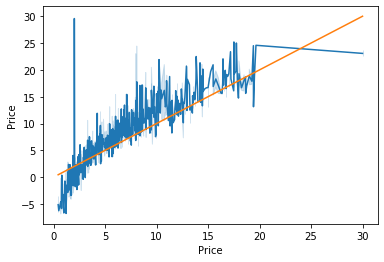

In [17]:
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
pred=linreg.predict(xtest)
print(r2_score(ytest,pred))
print('linreg accuracy')
s1=cross_val_score(linreg,xtrain,ytrain,cv=12)
print(s1.mean())
p1=sns.lineplot(ytest,pred)
p1=sns.lineplot(ytest,ytest)


0.8884464449988684
knn accuracy
0.8766551691519971


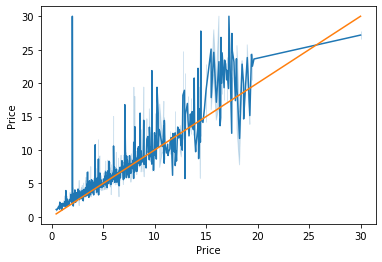

In [18]:
model=KNeighborsRegressor(n_neighbors=7);
model.fit(xtrain,ytrain);
knn=model.predict(xtest)
print(r2_score(ytest,knn))
print('knn accuracy')
s2=cross_val_score(model,xtrain,ytrain,cv=12)
print(s2.mean())
p2=sns.lineplot(ytest,knn)
p2=sns.lineplot(ytest,ytest)



0.9021504242052428
svr accuracy
0.8950538401931081


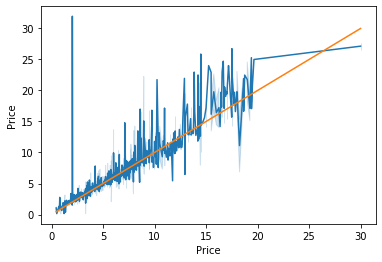

In [19]:
sup=SVR(C=100)
svr=sup.fit(xtrain,ytrain).predict(xtest)
print(r2_score(ytest,svr))
print('svr accuracy')
s3=cross_val_score(sup,xtrain,ytrain,cv=10)
print(s3.mean())
p3=sns.lineplot(ytest,svr)
p3=sns.lineplot(ytest,ytest)


0.8564594534086016
dtr accuracy
0.8602263182484654


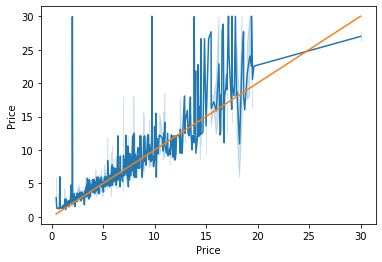

In [20]:
dtree = DecisionTreeRegressor(max_depth=8)
dtr=dtree.fit(xtrain, ytrain).predict(xtest)
print(r2_score(ytest,dtr))
print('dtr accuracy')
s4=cross_val_score(dtree,xtrain,ytrain,cv=10)
print(s4.mean())
p4=sns.lineplot(ytest,dtr)
p4=sns.lineplot(ytest,ytest)


0.9167537574728045
xgb accuracy
0.9204846267582696


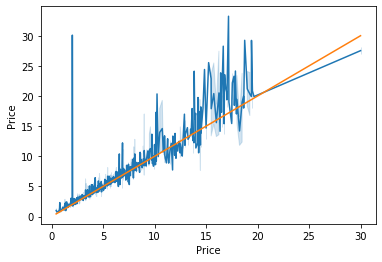

In [21]:
xgb_model=xgb.XGBRegressor(objective='reg:linear',max_depth=8,random_state=42,silent=True)
xgb_pred=xgb_model.fit(xtrain,ytrain).predict(xtest)
print(r2_score(ytest,xgb_pred))
print('xgb accuracy')
s5=cross_val_score(xgb_model,xtrain,ytrain,cv=10)
print(s5.mean())

p5=sns.lineplot(ytest,xgb_pred)
p5=sns.lineplot(ytest,ytest)

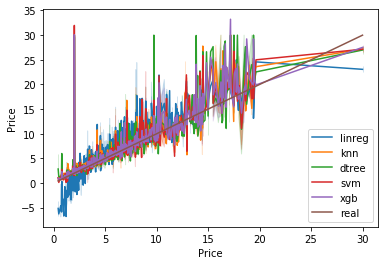

In [22]:
v1=sns.lineplot(ytest,pred)
v1=sns.lineplot(ytest,knn)
v1=sns.lineplot(ytest,dtr)
v1=sns.lineplot(ytest,svr)
v1=sns.lineplot(ytest,xgb_pred)
v1=sns.lineplot(ytest,ytest)
v1.legend(['linreg','knn','dtree','svm','xgb','real'])

# testing by removing the null values

In [23]:
dt2=pd.read_excel("Data_test.xlsx")

dt2.shape

(1234, 11)

In [24]:
temp = dt2["Name"].str.split(" ", n = 1, expand = True)
dt2['Brand']=temp[0]
dt2['Model']=temp[1]
dt2['Engine']=dt2.Engine.str.split(" ").str[0]
dt2['Power']=dt2.Power.str.split(" ").str[0]
dt2['Mileage']=dt2.Mileage.str.split(" ").str[0]
dt2['Year']=np.subtract(2020,dt2['Year'])


In [25]:
dt2['Power'].replace('null ',float('NaN'),inplace=True)
dt2['Power'].replace('null',float('NaN'),inplace=True)
dt2.dropna(subset=['Mileage','Power','Engine','Seats'],inplace=True)


In [26]:
dt2.drop(columns=['Name'],inplace=True)

In [27]:
dt2.dropna(how="all",inplace=True)
dt2['Power']=dt2['Power'].astype(float)
dt2['Mileage']=dt2['Mileage'].astype(float)
dt2['Engine']=dt2['Engine'].astype(float)
dt2['Year']=dt2['Year'].astype(float)
dt2['Kilometers_Driven']=dt2['Kilometers_Driven'].astype(float)


In [27]:
dt2['Brand']=le.fit_transform(dt2['Brand']).astype(float)
dt2['Location']=le.fit_transform(dt2['Location']).astype(float)
dt2['Fuel_Type']=le.fit_transform(dt2['Fuel_Type']).astype(float)
dt2['Transmission']=le.fit_transform(dt2['Transmission']).astype(float)
dt2['Owner_Type']=le.fit_transform(dt2['Owner_Type']).astype(float)
dt2['Model']=le.fit_transform(dt2['Model']).astype(float)
dt2['Engine']=dt2['Engine'].astype(float)
dt2['Power']=dt2['Power'].astype(float)
#dt2.drop('Mileage',axis=1,inplace=True)
#dt2.drop('Name',axis=1,inplace=True)
dt2.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
0,4.0,6.0,40929.0,0.0,1.0,0.0,32.26,998.0,58.20,4.0,15.0,69.0
1,3.0,7.0,54493.0,3.0,1.0,2.0,24.70,796.0,47.30,5.0,15.0,64.0
2,9.0,3.0,34000.0,1.0,1.0,0.0,13.68,2393.0,147.80,7.0,25.0,389.0
4,9.0,6.0,29000.0,3.0,1.0,0.0,18.50,1197.0,82.85,5.0,8.0,737.0
5,3.0,4.0,85609.0,1.0,1.0,2.0,16.00,2179.0,140.00,7.0,14.0,681.0


In [28]:
data2=pd.DataFrame(rbst.fit_transform(dt2),columns=col)

In [29]:
predicted=pd.DataFrame(xgb_model.predict(data2))
print(predicted)

              0
0      2.690385
1      3.649736
2     23.191803
3      4.623459
4     12.809004
5     21.300453
6      2.572111
7      4.638428
8     12.151860
9     16.820024
10     5.640015
11     4.350275
12     3.431087
13     5.657488
14    28.943834
15    20.539238
16     1.958132
17     7.537544
18     5.481393
19     4.192457
20     2.585667
21     3.186174
22     6.631960
23     1.056230
24     1.258863
25     6.051218
26     7.939599
27     3.268594
28     4.009590
29     5.617216
...         ...
1171   8.530763
1172   3.942242
1173   5.028341
1174   3.472070
1175   1.897783
1176   4.387584
1177   4.808243
1178   4.716455
1179   8.942161
1180  17.526148
1181  26.389801
1182   5.944192
1183   8.168552
1184   6.872541
1185   3.433001
1186  15.248450
1187   4.912250
1188   7.552404
1189   9.850347
1190   3.775916
1191   4.951978
1192   1.499634
1193   4.821045
1194   6.831958
1195   3.570668
1196   6.118727
1197   7.741632
1198   3.077504
1199   7.989368
1200  22.498987

[1201 r

In [30]:
predicted.to_excel (r'C:\Users\Pratvi\Desktop\predicted_ans2.xlsx', index = True, header=True)

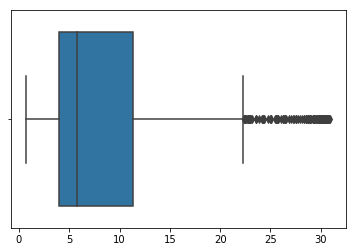

In [31]:
sns.boxplot(predicted)